In [1]:
import pandas as pd

대전 코로나 현황판을 이용하여 현재 코로나 발생자 정보를 수집 <br>

특히 당일 발생한 환자수와 발생 지역을 표기해 보자

21.12.08 기준 사이트 분석시 

메인 현황판 : https://www.daejeon.go.kr/corona19/index.do?menuId=0001

확진자 정보 : https://www.daejeon.go.kr/corona19/index.do?menuId=0002
  
  - 코로나19 대전 확진자 현황 ('21.12.08. 10시기준) ; javascript:fnBlogBoardView(&quot;1&quot;,&quot;1388517650&quot;)
  
  - 코로나19 대전 확진자 현황 (대전 8501~9000번) : javascript:fnBlogBoardView(&quot;1&quot;,&quot;1388096338&quot;)
  
  - 코로나19 대전 확진자 현황 (대전 8001~8500번) : javascript:fnBlogBoardView(&quot;1&quot;,&quot;1387540475&quot;);
  
크롬의 개발자 도구를 이용하여 게시판 주소와 게시물 페이지 정보 추출
  
  

In [2]:
main_page = "https://www.daejeon.go.kr/corona19/index.do?menuId=0001"

aggregate_data = pd.read_html(main_page, header=0, encoding='utf-8')
print(aggregate_data)
print()
print(f"aggregate_date의 타입 : {type(aggregate_data)}" )

[       구 분    확진환자  확진환자.1  확진환자.2 확진환자.3
0      구 분      총계    격리해제     격리중     사망
1      누 계  9,751명  8,385명  1,291명    75명
2  전일대비 증감    167명    143명     22명     2명,        구 분     대상자수 검사 현황  검사 현황.1 검사 현황.2 검사 현황.3
0      구 분     대상자수   양성*       음성     검사중    검사예정
1      누 계  30,715명  118명  30,520명     48명     29명
2  전일대비 증감     +77명   +1명    +137명    -45명    -16명]

aggregate_date의 타입 : <class 'list'>


In [3]:
main_page = "https://www.daejeon.go.kr/corona19/index.do?menuId=0001"

aggregate_data = pd.read_html(main_page, header=1, encoding='utf-8')
print(aggregate_data)

[       구 분      총계    격리해제     격리중   사망
0      누 계  9,751명  8,385명  1,291명  75명
1  전일대비 증감    167명    143명     22명   2명,        구 분     대상자수   양성*       음성   검사중  검사예정
0      누 계  30,715명  118명  30,520명   48명   29명
1  전일대비 증감     +77명   +1명    +137명  -45명  -16명]


In [4]:
aggregate_data[0]

,구 분,총계,격리해제,격리중,사망
0,누 계,"9,751명","8,385명","1,291명",75명
1,전일대비 증감,167명,143명,22명,2명


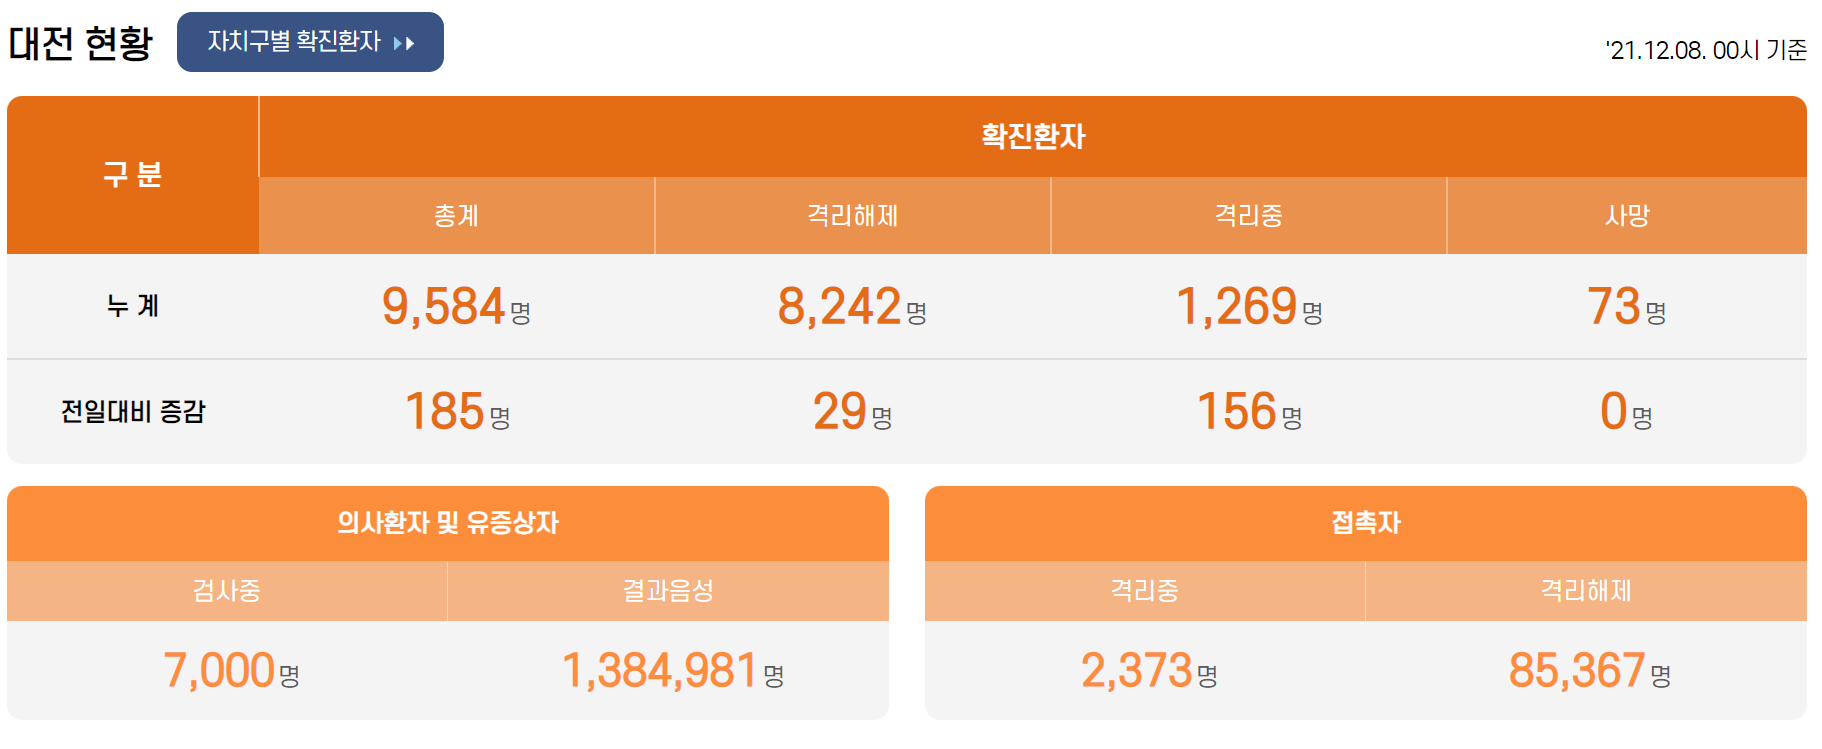

In [5]:
from IPython.display import Image
 
Image("img/today_covid_211208.png") # code안에서 나오게 할 때

In [6]:
total1 = aggregate_data[0]
print(total1.columns)
print()
print(total1.index)
print()
print(total1.values)
print()
print(total1.values[0])
print()
print(total1.values[1])
print()

Index(['구 분', '총계', '격리해제', '격리중', '사망'], dtype='object')

RangeIndex(start=0, stop=2, step=1)

[['누 계' '9,751명' '8,385명' '1,291명' '75명']
 ['전일대비 증감' '167명' '143명' '22명' '2명']]

['누 계' '9,751명' '8,385명' '1,291명' '75명']

['전일대비 증감' '167명' '143명' '22명' '2명']



In [7]:
total2 = aggregate_data[1]
print(total2.columns)
print()
print(total2.index)
print()
print(total2.values)
print()
print(total2.values[0])
print()
print(total2.values[1])
print()

Index(['구 분', '대상자수', '양성*', '음성', '검사중', '검사예정'], dtype='object')

RangeIndex(start=0, stop=2, step=1)

[['누 계' '30,715명' '118명' '30,520명' '48명' '29명']
 ['전일대비 증감' '+77명' '+1명' '+137명' '-45명' '-16명']]

['누 계' '30,715명' '118명' '30,520명' '48명' '29명']

['전일대비 증감' '+77명' '+1명' '+137명' '-45명' '-16명']



리스트로 값으로 뽑힌 데이터가 숫자+문자인 문자열임을 기억하세요.
숫자로 변환해 주어야 합니다.

re 모듈의 패턴을 이용하여 문자는 제거하고 숫자만 추출해 줄 수 있습니다.

In [8]:
import re

arr = total1.values[1]
print(arr)

str1 = arr[1]
num1 = re.sub(r'[^0-9]', '', str1)

print('전일대비 증감 총계 :' + arr[1])
print('전일대비 증감 총계 :' + num1)

['전일대비 증감' '167명' '143명' '22명' '2명']
전일대비 증감 총계 :167명
전일대비 증감 총계 :167


<h3> 확진자 정보 추출 <br>
https://www.daejeon.go.kr/corona19/index.do?menuId=0002 </h3>

In [9]:
p1208_10 = "https://www.daejeon.go.kr/corona19/index.do?menuId=0002"

confirmed_case = pd.read_html(p1208_10, header=0, encoding='utf-8')
print(confirmed_case)

[       대전  질병청   확진일 연령대 관할주소지(거주지)              접촉력  조치사항
0    9751  미채번  12.7  20         동구           역학조사 중  격리 중
1    9750  미채번  12.7  70         동구           역학조사 중  격리 중
2    9749  미채번  12.7  70         동구           역학조사 중  격리 중
3    9748  미채번  12.7  50         중구           역학조사 중  격리 중
4    9747  미채번  12.7  70        대덕구           역학조사 중  격리 중
..    ...  ...   ...  ..        ...              ...   ...
246  9505  미채번  12.7  80         동구  대전 8580번 확진자 관련  격리 중
247  9504  미채번  12.7  90         서구  대전 8580번 확진자 관련  격리 중
248  9503  미채번  12.7  90         동구  대전 8580번 확진자 관련  격리 중
249  9502  미채번  12.7  70        대덕구  대전 8580번 확진자 관련  격리 중
250  9501  미채번  12.7  80         동구  대전 8580번 확진자 관련  격리 중

[251 rows x 7 columns]]


메인페이지의 경우 표의 정보를 가져올 때 read_html()로 받았다. 
그럼 데이터 타입이 list가 된다.

이를 dataframe으로 받고 싶으면 리스트 변수의 이름에 [0] 값만 가져오면 된다.

In [10]:
confirmed_case
df = confirmed_case[0]
df

,대전,질병청,확진일,연령대,관할주소지(거주지),접촉력,조치사항
0,9751,미채번,12.7,20,동구,역학조사 중,격리 중
1,9750,미채번,12.7,70,동구,역학조사 중,격리 중
2,9749,미채번,12.7,70,동구,역학조사 중,격리 중
3,9748,미채번,12.7,50,중구,역학조사 중,격리 중
4,9747,미채번,12.7,70,대덕구,역학조사 중,격리 중
...,...,...,...,...,...,...,...
246,9505,미채번,12.7,80,동구,대전 8580번 확진자 관련,격리 중
247,9504,미채번,12.7,90,서구,대전 8580번 확진자 관련,격리 중
248,9503,미채번,12.7,90,동구,대전 8580번 확진자 관련,격리 중
249,9502,미채번,12.7,70,대덕구,대전 8580번 확진자 관련,격리 중


현재의 경우 총 584개의 자료를 가져왔는데 표가 최초 5개와 마지막 5개만 보이고 짤려보인다 <br>
이를 수정하려면 다음과 같이 하면된다.

In [11]:
import pandas as pd
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 1000)        #총 1000개를 보여달라 -- 주피터노트북의 경우 자동스크롤이 생기로 주피터랩의 경우는 설정해야함
pd.set_option('display.max_columns', 10)      #총 10개의 컬럼을 보여달라 

pandas version:  1.3.4


In [12]:
df

,대전,질병청,확진일,연령대,관할주소지(거주지),접촉력,조치사항
0,9751,미채번,12.7,20,동구,역학조사 중,격리 중
1,9750,미채번,12.7,70,동구,역학조사 중,격리 중
2,9749,미채번,12.7,70,동구,역학조사 중,격리 중
3,9748,미채번,12.7,50,중구,역학조사 중,격리 중
4,9747,미채번,12.7,70,대덕구,역학조사 중,격리 중
5,9746,미채번,12.7,10,대덕구,역학조사 중,격리 중
6,9745,미채번,12.7,60,대덕구,역학조사 중,격리 중
7,9744,미채번,12.7,10,대덕구,역학조사 중,격리 중
8,9743,미채번,12.7,60,서구,역학조사 중,격리 중
9,9742,미채번,12.7,50,서구,역학조사 중,격리 중


In [13]:
print(df.index)
print(df.columns)
print(df.values)

RangeIndex(start=0, stop=251, step=1)
Index(['대전', '질병청', '확진일', '연령대', '관할주소지(거주지)', '접촉력', '조치사항'], dtype='object')
[[9751 '미채번' 12.7 ... '동구' '역학조사 중' '격리 중']
 [9750 '미채번' 12.7 ... '동구' '역학조사 중' '격리 중']
 [9749 '미채번' 12.7 ... '동구' '역학조사 중' '격리 중']
 ...
 [9503 '미채번' 12.7 ... '동구' '대전 8580번 확진자 관련' '격리 중']
 [9502 '미채번' 12.7 ... '대덕구' '대전 8580번 확진자 관련' '격리 중']
 [9501 '미채번' 12.7 ... '동구' '대전 8580번 확진자 관련' '격리 중']]


In [14]:
df.loc[:, ['대전', '확진일', '관할주소지(거주지)', '연령대']]

,대전,확진일,관할주소지(거주지),연령대
0,9751,12.7,동구,20
1,9750,12.7,동구,70
2,9749,12.7,동구,70
3,9748,12.7,중구,50
4,9747,12.7,대덕구,70
5,9746,12.7,대덕구,10
6,9745,12.7,대덕구,60
7,9744,12.7,대덕구,10
8,9743,12.7,서구,60
9,9742,12.7,서구,50


In [15]:
df_yesterday = df.loc[df['확진일'] > 12.6]
df_yesterday

,대전,질병청,확진일,연령대,관할주소지(거주지),접촉력,조치사항
0,9751,미채번,12.7,20,동구,역학조사 중,격리 중
1,9750,미채번,12.7,70,동구,역학조사 중,격리 중
2,9749,미채번,12.7,70,동구,역학조사 중,격리 중
3,9748,미채번,12.7,50,중구,역학조사 중,격리 중
4,9747,미채번,12.7,70,대덕구,역학조사 중,격리 중
5,9746,미채번,12.7,10,대덕구,역학조사 중,격리 중
6,9745,미채번,12.7,60,대덕구,역학조사 중,격리 중
7,9744,미채번,12.7,10,대덕구,역학조사 중,격리 중
8,9743,미채번,12.7,60,서구,역학조사 중,격리 중
9,9742,미채번,12.7,50,서구,역학조사 중,격리 중


In [16]:
df_yesterday.count()

대전            251
질병청           251
확진일           251
연령대           251
관할주소지(거주지)    251
접촉력           251
조치사항          251
dtype: int64

In [17]:
(df_yesterday.loc[:,['확진일']]).count().values

array([251], dtype=int64)

In [18]:
yesterday_cnt = (df_yesterday.loc[:,['확진일']]).count().values[0]
yesterday_cnt

251

In [21]:
df_yesterday.to_csv('./covid_yesterday.csv', sep=',', na_rep='NaN')

<h3>ElasticSearch에 데이터 삽입</h3>

In [22]:
from datetime import datetime
from elasticsearch import Elasticsearch